## Factor Analyses (Dimensionality Reduction)

In [1]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(psych)))
library(GPArotation)
suppressWarnings(suppressMessages(library(ltm)))
library(emmeans)

# Load the data
load(file = "~/Documents/holding_gwu_dissertation/data/study3_2_data.RData")
paste0("Initial sample: ", nrow(vcf_data))

[1] "Initial sample: 371"

In [2]:
vcf_data %>% filter(!is.na(intention_6)) %>% nrow()

[1] 371

In [3]:
vcf_data$global2_6 <- factor(vcf_data$global2_6,
                             levels = c("None", "Low", "Medium", "High"))
vcf_data$base_global2 <- factor(vcf_data$base_global2,
                                levels = c("None", "Low", "Medium", "High"))
vcf_data$global1_6 <- factor(vcf_data$global1_6,
                             levels = c("None", "Low", "Medium", "High"))
vcf_data$base_global1 <- factor(vcf_data$base_global1,
                                levels = c("None", "Low", "Medium", "High"))

In [4]:
suppressWarnings(suppressMessages(library(rstatix)))
vcf_data %>% dplyr::select(base_intention_n, intention_6_n, 
                           fed_gov_trust, local_gov_trust,
                           cdc_trust, fda_trust,
                           sp_confidence_6_n, sp_complacency_6_n,
                           gen_confidence_6, age,
                           republican, gender) %>% 
      mutate(republican = republican %>% as.numeric(),
             gender = gender %>% as.numeric()) %>%
      cor_mat() %>%
      cor_mark_significant()

rowname,base_intention_n,intention_6_n,fed_gov_trust,local_gov_trust,cdc_trust,fda_trust,sp_confidence_6_n,sp_complacency_6_n,gen_confidence_6,age,republican,gender
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
base_intention_n,,,,,,,,,,,,
intention_6_n,0.6****,,,,,,,,,,,
fed_gov_trust,0.41****,0.37****,,,,,,,,,,
local_gov_trust,0.36****,0.36****,0.82****,,,,,,,,,
cdc_trust,0.44****,0.43****,0.63****,0.56****,,,,,,,,
fda_trust,0.39****,0.4****,0.57****,0.56****,0.78****,,,,,,,
sp_confidence_6_n,0.52****,0.63****,0.45****,0.39****,0.5****,0.47****,,,,,,
sp_complacency_6_n,0.5****,0.64****,0.45****,0.4****,0.53****,0.5****,0.81****,,,,,
gen_confidence_6,0.3****,0.39****,0.31****,0.3****,0.42****,0.39****,0.54****,0.48****,,,,


### Dimensionality Reduction

Cronbach's alpha should be greater than 0.7 for measure to be considered reliable

[1] 371



Cronbach's alpha for the 'df %>% dplyr::select(-participant_id)' data-set

Items: 19
Sample units: 371
alpha: 0.808


,fed_gov_trust,local_gov_trust,cdc_trust,fda_trust,gist_cat8_change,gist_cat7_change,gist_cat6_change,gist_cat5_change,gist_cat4_change,gist_cat3_change,gist_cat2_change,gist_cat1_change,global1_change,global2_change,sp_safety_change,sp_efficacy_change,sp_necessity_change,sp_importance_change,sp_trust_change
fed_gov_trust,1.00000000,0.8225339111,0.62936139,0.57332326,0.09920100,0.04324865,0.08745557,0.14955707,0.06987416,0.13057062,0.12880836,0.05751659,-0.0174383073,0.01519948,0.06966859,0.11071762,0.100028789,0.09824373,0.08524544
local_gov_trust,0.82253391,1.0000000000,0.56466628,0.55641502,0.09129635,0.05468599,0.10231300,0.14866301,0.07394377,0.13127652,0.11076829,0.04202380,-0.0004015866,-0.01292597,0.06467236,0.09704249,0.072787984,0.07052319,0.05623184
cdc_trust,0.62936139,0.5646662837,1.00000000,0.77646391,0.12650942,0.11248538,0.09961039,0.10545078,0.02141868,0.14769125,0.05787470,0.03419471,-0.0238035498,-0.03464518,0.09842740,0.09494085,0.151147471,0.10121264,0.14855365
fda_trust,0.57332326,0.5564150215,0.77646391,1.00000000,0.09150724,0.05545379,0.02692679,0.14247820,0.06010013,0.14450472,0.04714550,0.01386759,-0.0372687377,0.03844645,0.05626261,0.11329773,0.116917966,0.11470985,0.12204175
gist_cat8_change,0.09920100,0.0912963541,0.12650942,0.09150724,1.00000000,0.30680895,0.28434576,0.20640550,0.30560589,0.21417513,0.24345074,0.18070175,0.1871929128,0.10496718,0.24667039,0.27593565,0.265323325,0.23174047,0.20441696
gist_cat7_change,0.04324865,0.0546859855,0.11248538,0.05545379,0.30680895,1.00000000,0.50074222,0.20406030,0.20646919,0.15214750,0.16630652,0.19880985,0.1385642541,0.07624034,0.19388396,0.23973961,0.214908119,0.14150819,0.22100661
gist_cat6_change,0.08745557,0.1023129954,0.09961039,0.02692679,0.28434576,0.50074222,1.00000000,0.14652015,0.20421466,0.18889813,0.21636159,0.21424360,0.0956173738,0.11315455,0.15428315,0.14255906,0.139852460,0.13193676,0.15714125
gist_cat5_change,0.14955707,0.1486630097,0.10545078,0.14247820,0.20640550,0.20406030,0.14652015,1.00000000,0.35515010,0.07433979,0.28615045,0.34138581,0.2026678701,0.15493011,0.15345200,0.16981754,0.126982717,0.19553551,0.18049468
gist_cat4_change,0.06987416,0.0739437719,0.02141868,0.06010013,0.30560589,0.20646919,0.20421466,0.35515010,1.00000000,0.26102127,0.68327106,0.38679612,0.1911857896,0.25449331,0.11781127,0.15350488,0.141749637,0.15510457,0.18046428
gist_cat3_change,0.13057062,0.1312765166,0.14769125,0.14450472,0.21417513,0.15214750,0.18889813,0.07433979,0.26102127,1.00000000,0.26319646,0.10444661,0.0439272460,0.12173390,0.05887231,0.10473205,0.136331510,0.11729924,0.09668892


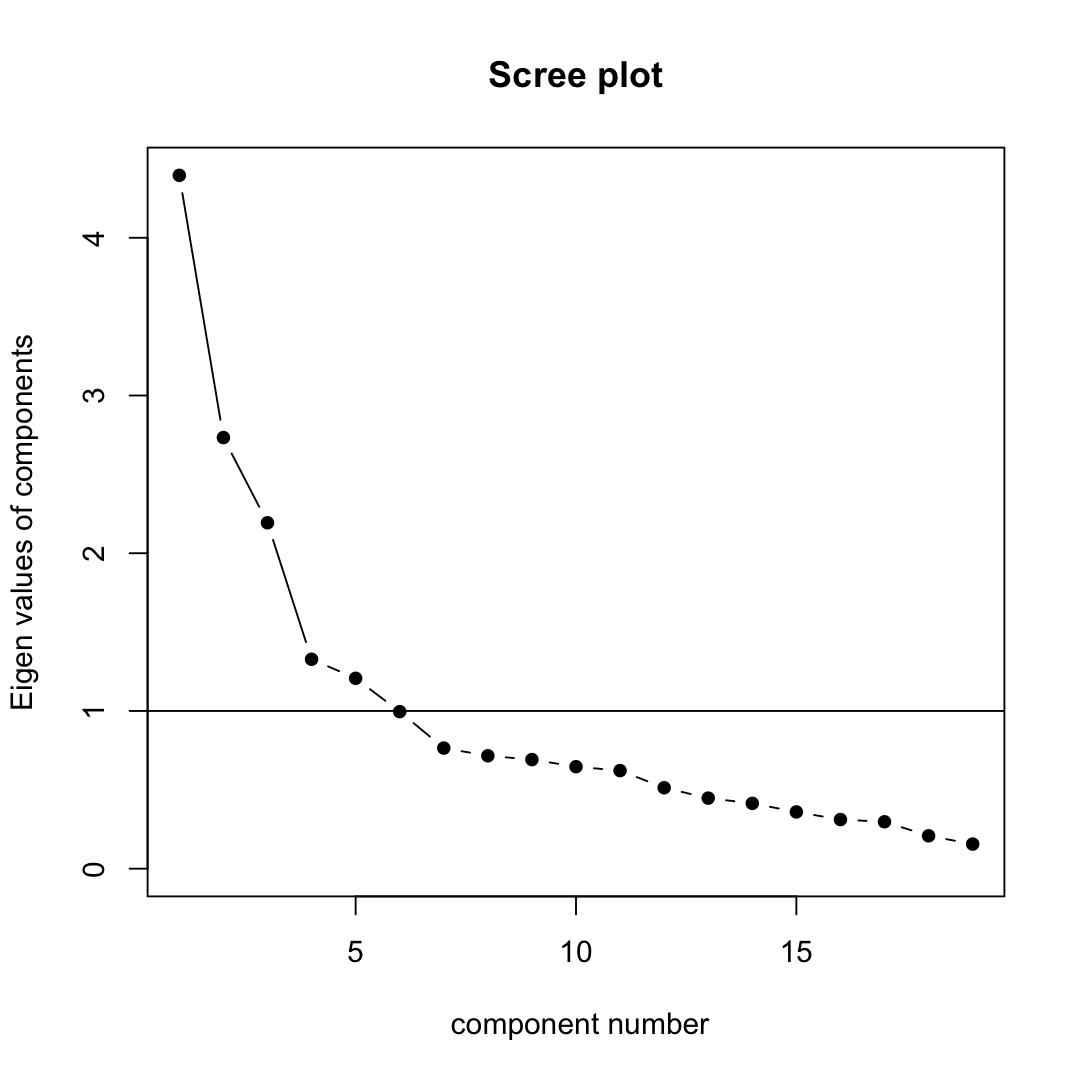

In [5]:
df <- vcf_data %>%
       mutate(
           # government trust
           fed_gov_trust = fed_gov_trust %>% as.numeric() %>% scale(),     
           local_gov_trust = local_gov_trust %>% as.numeric() %>% scale(),
           
           # health organization trust
           cdc_trust = cdc_trust %>% as.numeric() %>% scale(),
           fda_trust = fda_trust %>% as.numeric() %>% scale(),
                          
           # social norms
           social_norm1 = people_think_i_should_vax %>% as.numeric() %>% scale(),
           social_norm2 = people_important_to_me_are_vax %>% as.numeric() %>% scale(),
           
           # categorical risk
           gist_cat8_change = (as.numeric(gist_cat8_6) - as.numeric(base_gist_cat8)) %>% scale(),
           gist_cat7_change = (as.numeric(gist_cat7_6) - as.numeric(base_gist_cat7)) %>% scale(),
           gist_cat6_change = (as.numeric(gist_cat6_6) - as.numeric(base_gist_cat6)) %>% scale(),
           gist_cat5_change = (as.numeric(gist_cat5_6) - as.numeric(base_gist_cat5)) %>% scale(),
           gist_cat4_change = (as.numeric(gist_cat4_6) - as.numeric(base_gist_cat4)) %>% scale(),
           gist_cat3_change = (as.numeric(gist_cat3_6) - as.numeric(base_gist_cat3)) %>% scale(),
           gist_cat2_change = (as.numeric(gist_cat2_6) - as.numeric(base_gist_cat2)) %>% scale(),
           gist_cat1_change = (as.numeric(gist_cat1_6) - as.numeric(base_gist_cat1)) %>% scale(),           
           
           # verbatim risk
           vax_danger_6 = vax_danger_6 %>% scale(),
           worry_6 = worry_6 %>% scale(),
           
           # verbatim benefit
           useful_6 = useful_6 %>% scale(),

           # global risk change
           global1_change = (as.numeric(global1_6) - as.numeric(base_global1)) %>% scale(),
           global2_change = (as.numeric(global2_6) - as.numeric(base_global2)) %>% scale(),           
           
           # principles
           resp_princ_6 = resp_princ_6 %>% scale(),
           risk_princ_6 = risk_princ_6 %>% scale(),
           
           # vaccine beliefs
           sp_safety_change = (as.numeric(sp_safety_6) - as.numeric(base_sp_safety)) %>% scale(),
           sp_efficacy_change = (as.numeric(sp_efficacy_6) - as.numeric(base_sp_efficacy)) %>% scale(),
           sp_necessity_change = (as.numeric(sp_necessity_6) - as.numeric(base_sp_necessity)) %>% scale(),
           sp_importance_change = (as.numeric(sp_importance_6) - as.numeric(base_sp_importance)) %>% scale(),
           sp_trust_change = (as.numeric(sp_trust_6) - as.numeric(base_sp_trust)) %>% scale()    
       ) %>%

        dplyr::select(fed_gov_trust, local_gov_trust, 
                      cdc_trust, fda_trust,
                      gist_cat8_change, gist_cat7_change, 
                      gist_cat6_change, 
                      gist_cat5_change, 
                      gist_cat4_change, 
                      gist_cat3_change, 
                      gist_cat2_change, 
                      gist_cat1_change,
                      global1_change,
                      global2_change,                      
                      sp_safety_change, sp_efficacy_change, 
                      sp_necessity_change, sp_importance_change, 
                      sp_trust_change, 
                      participant_id)

print(nrow(df %>% dplyr::select(-participant_id)))
cronbach.alpha(df %>% dplyr::select(-participant_id))

corr_mat <- cor(df %>% dplyr::select(-participant_id), use = 'pairwise.complete.obs')
corr_mat

options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 180)
scree(corr_mat, factors = FALSE) 

Parallel analysis suggests that the number of factors =  5  and the number of components =  NA 


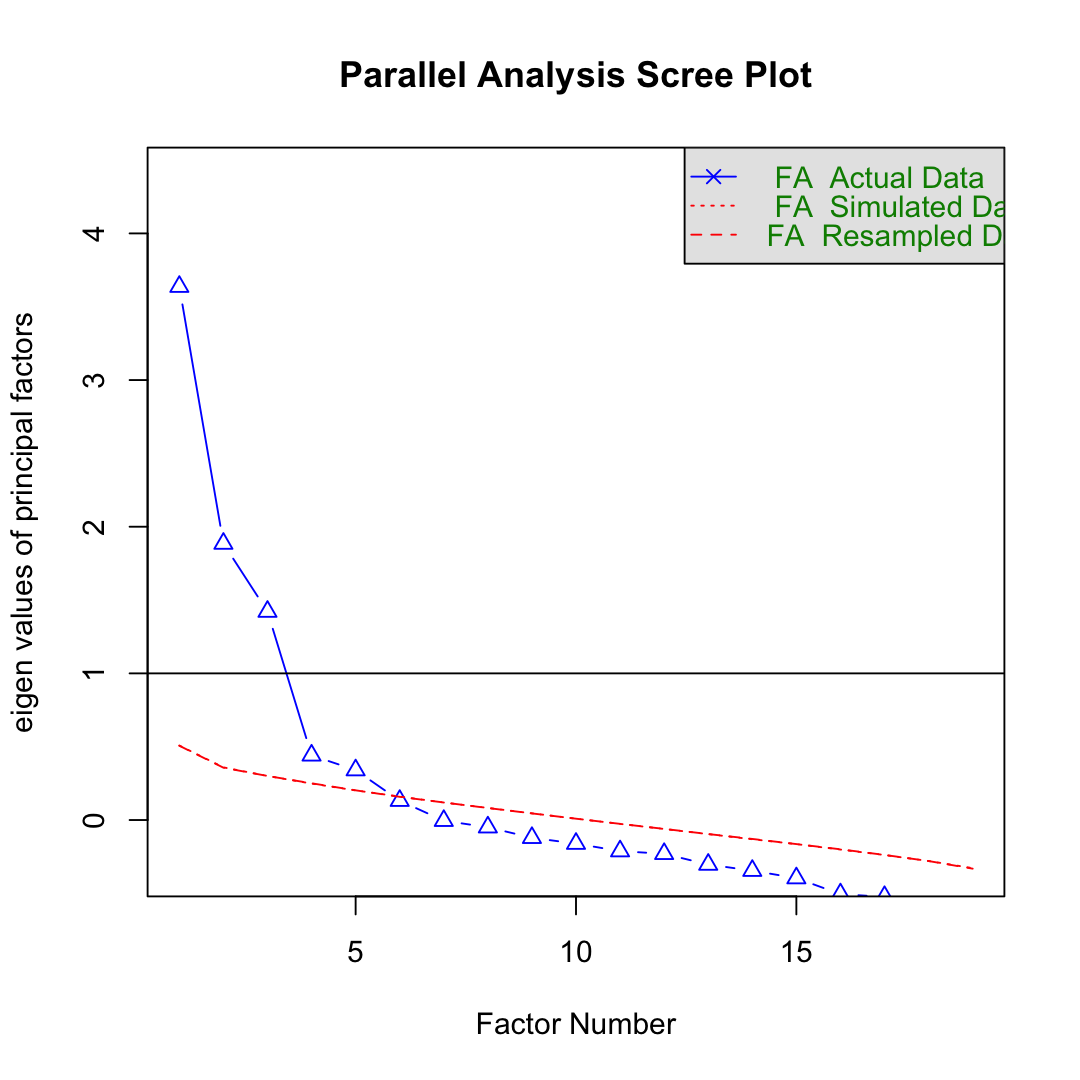

In [6]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 180)
psych::fa.parallel(df %>% dplyr::select(-participant_id), 
                   fm="pa", fa="fa",  main = "Parallel Analysis Scree Plot", n.iter=500)

### Check the factorability of the variables 

https://medium.com/analytics-vidhya/multiple-linear-regression-factor-analysis-in-r-35a26a2575cc
https://en.wikipedia.org/wiki/Kaiser%e2%80%93Meyer%e2%80%93Olkin_test

In flamboyant fashion, Kaiser proposed that a KMO > 0.9 was marvelous, in the 0.80s, meritorious, in the 0.70s, middling, in the 0.60s, mediocre, in the 0.50s, miserable, and less than 0.5 would be unacceptable. In general, KMO values between 0.8 and 1 indicate the sampling is adequate. KMO values less than 0.6 indicate the sampling is not adequate and that remedial action should be taken. In contrast, others set this cutoff value at 0.5.

In [7]:
KMO(corr_mat)
cortest.bartlett(corr_mat, nrow(df))

Kaiser-Meyer-Olkin factor adequacy
Call: KMO(r = corr_mat)
Overall MSA =  0.77
MSA for each item = 
       fed_gov_trust      local_gov_trust            cdc_trust 
                0.72                 0.72                 0.72 
           fda_trust     gist_cat8_change     gist_cat7_change 
                0.72                 0.90                 0.75 
    gist_cat6_change     gist_cat5_change     gist_cat4_change 
                0.74                 0.85                 0.74 
    gist_cat3_change     gist_cat2_change     gist_cat1_change 
                0.89                 0.72                 0.79 
      global1_change       global2_change     sp_safety_change 
                0.53                 0.60                 0.85 
  sp_efficacy_change  sp_necessity_change sp_importance_change 
                0.88                 0.81                 0.82 
     sp_trust_change 
                0.84 

$chisq
[1] 2658.551

$p.value
[1] 0

$df
[1] 171

Factor Analysis using method =  ml
Call: psych::fa(r = df %>% dplyr::select(-participant_id), nfactors = 5, 
    rotate = "oblimin", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                     item   ML4   ML5   ML3   ML1   ML2   h2    u2 com
sp_importance_change    1  0.77  0.00  0.02 -0.03  0.02 0.59 0.409 1.0
sp_necessity_change     2  0.76  0.00 -0.03  0.04 -0.08 0.58 0.422 1.0
sp_safety_change        3  0.74 -0.04  0.01 -0.02  0.03 0.54 0.464 1.0
sp_efficacy_change      4  0.72 -0.01  0.06 -0.06  0.05 0.52 0.478 1.0
sp_trust_change         5  0.67  0.05 -0.06  0.07 -0.03 0.47 0.534 1.1
gist_cat7_change        6  0.22  0.22 -0.06  0.10  0.08 0.15 0.854 2.8
gist_cat4_change        7  0.01  0.84 -0.01 -0.02  0.04 0.71 0.289 1.0
gist_cat2_change        8 -0.05  0.81  0.02  0.00 -0.05 0.64 0.362 1.0
gist_cat1_change        9  0.05  0.47 -0.02  0.01 -0.01 0.23 0.767 1.0
gist_cat5_change       10  0.12  0.35  0.10  0.01  0.13 0.22 0.785 1.7
gist_c

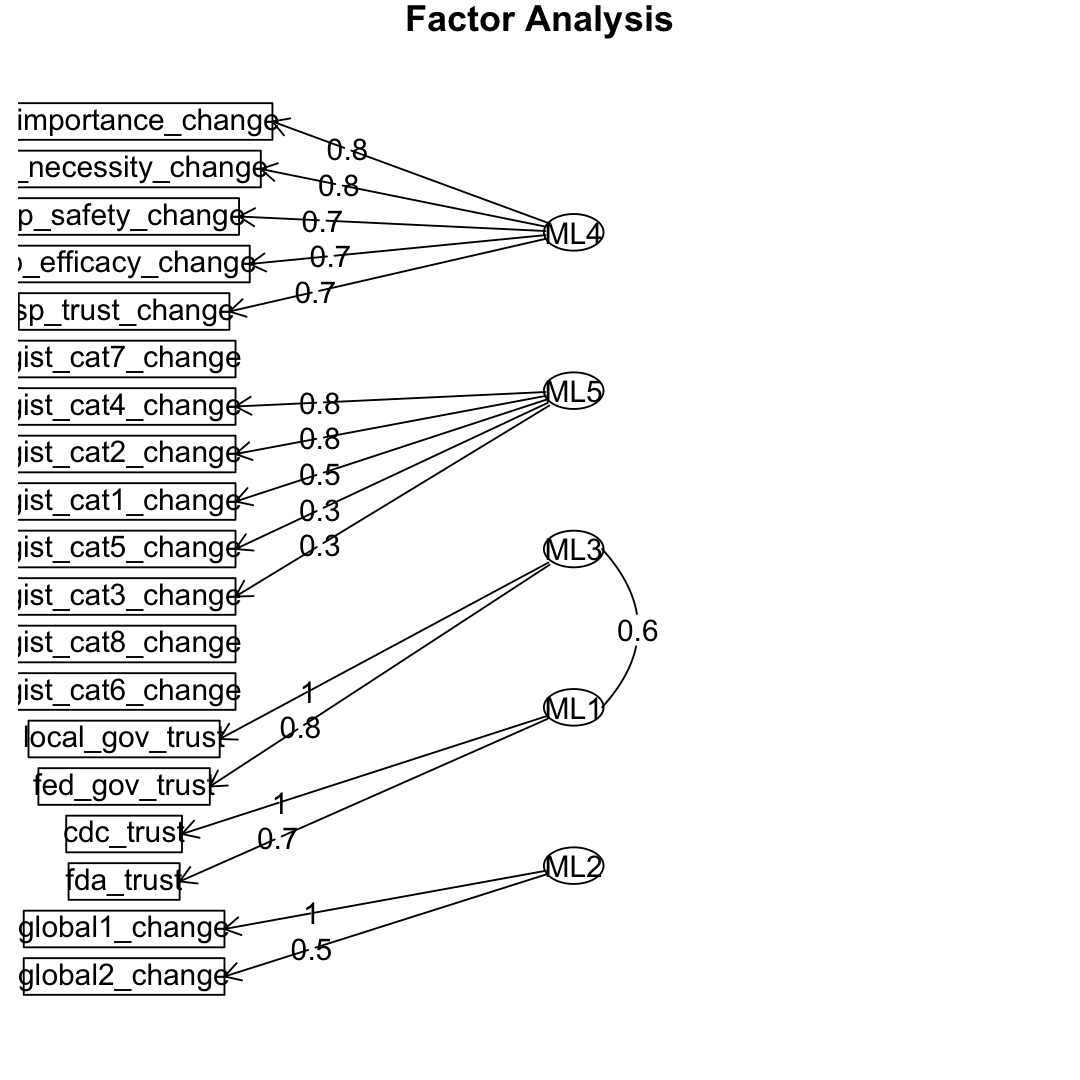

In [8]:
fit <- psych::fa(df %>% dplyr::select(-participant_id), fm = "ml", rotate = "oblimin", nfactors = 5) %>%
  fa.sort()
print(fit, sort = TRUE)
fa.diagram(fit)

In [9]:
print(fit$loadings, digits = 4, cutoff = 0.4)


Loadings:
                     ML4     ML5     ML3     ML1     ML2    
sp_importance_change  0.7694                                
sp_necessity_change   0.7597                                
sp_safety_change      0.7397                                
sp_efficacy_change    0.7173                                
sp_trust_change       0.6653                                
gist_cat7_change                                            
gist_cat4_change              0.8360                        
gist_cat2_change              0.8139                        
gist_cat1_change              0.4725                        
gist_cat5_change                                            
gist_cat3_change                                            
gist_cat8_change                                            
gist_cat6_change                                            
local_gov_trust                       0.9917                
fed_gov_trust                         0.7520                
cdc_trust    

Factor Analysis using method =  ml
Call: psych::fa(r = df %>% dplyr::select(-participant_id), nfactors = 5, 
    rotate = "varimax", fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                     item  ML4  ML5   ML3   ML1   ML2   h2    u2 com
sp_importance_change    1 0.75 0.13  0.03  0.01  0.06 0.59 0.409 1.1
sp_necessity_change     2 0.75 0.12  0.02  0.07 -0.05 0.58 0.422 1.1
sp_safety_change        3 0.72 0.09  0.03  0.02  0.06 0.54 0.464 1.0
sp_efficacy_change      4 0.70 0.12  0.07  0.00  0.09 0.52 0.478 1.1
sp_trust_change         5 0.66 0.16  0.00  0.08  0.00 0.47 0.534 1.1
gist_cat4_change        6 0.06 0.83  0.00 -0.04  0.11 0.71 0.289 1.1
gist_cat2_change        7 0.00 0.80  0.04 -0.01  0.02 0.64 0.362 1.0
gist_cat1_change        8 0.08 0.48 -0.01 -0.01  0.03 0.23 0.767 1.1
gist_cat5_change        9 0.15 0.39  0.10  0.04  0.16 0.22 0.785 1.9
gist_cat8_change       10 0.28 0.34  0.03  0.07  0.15 0.22 0.780 2.5
gist_cat3_change       11 0.

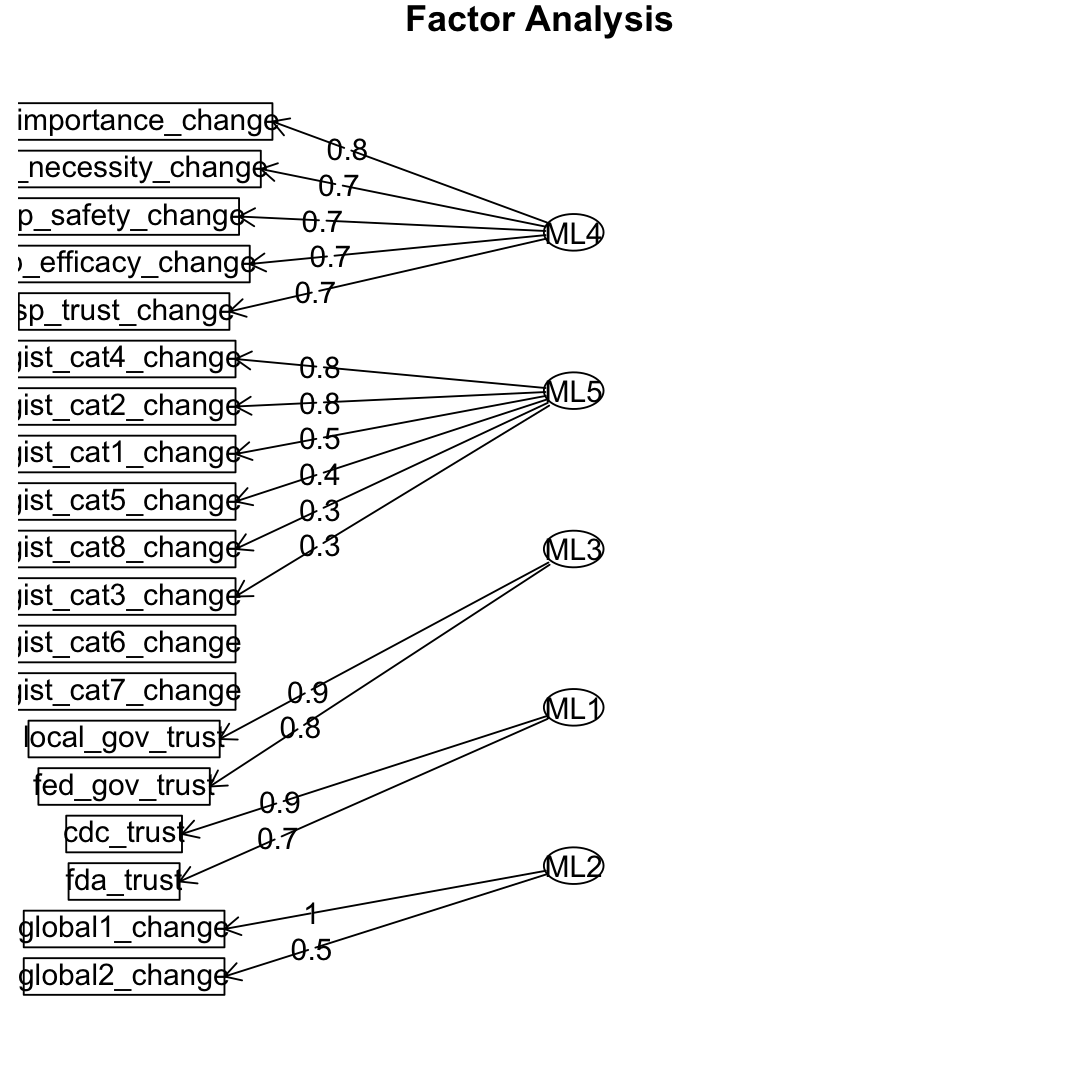

In [10]:
fit <- psych::fa(df %>% dplyr::select(-participant_id), fm = "ml", rotate = "varimax", nfactors = 5) %>%
  fa.sort()
print(fit, sort = TRUE)
fa.diagram(fit)

In [11]:
print(fit$loadings, digits = 4, cutoff = 0.40)


Loadings:
                     ML4     ML5     ML3     ML1     ML2    
sp_importance_change  0.7541                                
sp_necessity_change   0.7453                                
sp_safety_change      0.7235                                
sp_efficacy_change    0.7033                                
sp_trust_change       0.6594                                
gist_cat4_change              0.8325                        
gist_cat2_change              0.7972                        
gist_cat1_change              0.4753                        
gist_cat5_change                                            
gist_cat8_change                                            
gist_cat3_change                                            
gist_cat6_change                                            
gist_cat7_change                                            
local_gov_trust                       0.9132                
fed_gov_trust                         0.7584  0.4032        
cdc_trust    

### Merge the factor scores with the original data

In [12]:
pc <- principal(df %>% dplyr::select(-participant_id),nfactors = 5, rotate="varimax", scores=TRUE)
pc_df <- pc$score %>% as_tibble()
pc_df <- cbind(df$participant_id, pc_df)

colnames(pc_df) <- c("participant_id", colnames(pc_df)[-1])
#pc_df %>% head()

colnames(pc_df) <- c("participant_id",
                     "pc1_phi_trust",
                     "pc2_ord_gist",
                     "pc3_gov_trust",   
                     "pc5_cat_gists",                   
                     "pc4_vax_beliefs"
)

#pc_df %>% head()

vcf_data <- vcf_data %>% left_join(pc_df, by = "participant_id")

### Regression


Call:
lm(formula = intention_6_n ~ base_intention_n + pc1_phi_trust + 
    pc3_gov_trust + pc5_cat_gists + pc2_ord_gist + pc4_vax_beliefs, 
    data = vcf_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0351 -0.6992 -0.1235  0.4656  5.5764 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       0.98075    0.12432   7.889 3.60e-14 ***
base_intention_n  0.73140    0.05839  12.525  < 2e-16 ***
pc1_phi_trust     0.83076    0.07069  11.753  < 2e-16 ***
pc3_gov_trust     0.21640    0.07051   3.069  0.00231 ** 
pc5_cat_gists     0.33090    0.07051   4.693 3.82e-06 ***
pc2_ord_gist      0.37783    0.07967   4.743 3.03e-06 ***
pc4_vax_beliefs   0.09740    0.07054   1.381  0.16823    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.356 on 364 degrees of freedom
Multiple R-squared:  0.5775,	Adjusted R-squared:  0.5705 
F-statistic: 82.91 on 6 and 364 DF,  p-value: < 2.2e-16


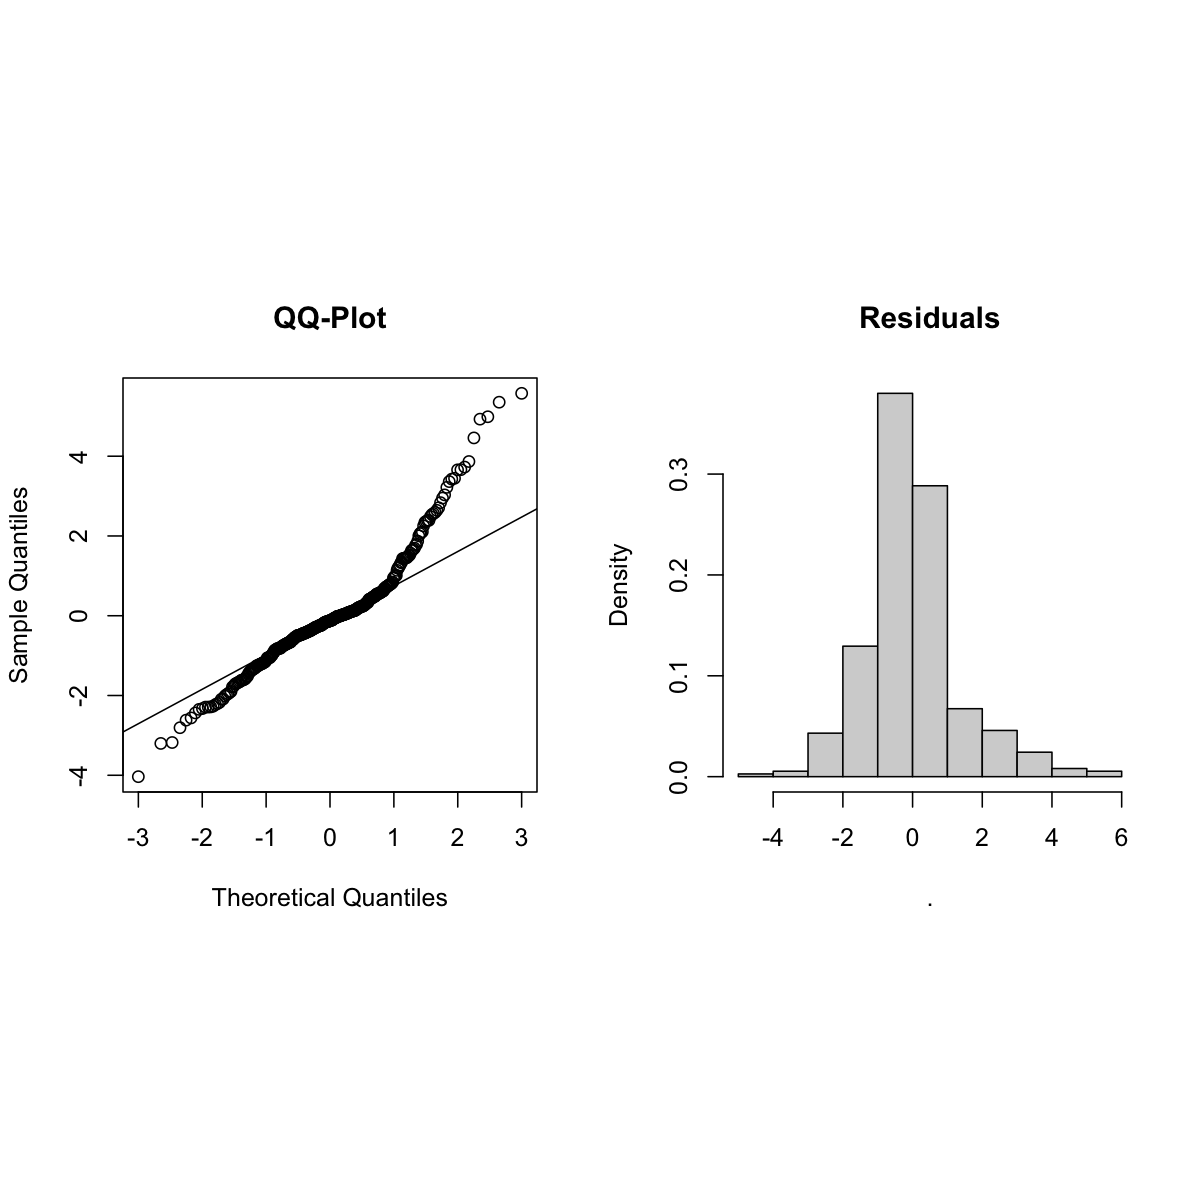

In [13]:
m1 <- lm(intention_6_n ~    base_intention_n +
                            pc1_phi_trust + 
                            pc3_gov_trust + 
                            pc5_cat_gists +                        
                            pc2_ord_gist + 
                            pc4_vax_beliefs, 
                            data = vcf_data) 

plot_qqs_hist <- function(model){
    op <- par(pty = "s", mfrow = c(1, 2))
    qqnorm(model$residuals, main = "QQ-Plot")
    qqline(model$residuals)
    model$residuals %>% hist(main = "Residuals", freq = FALSE)
}

summary(m1)
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 150)
plot_qqs_hist(m1)